In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [5]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [6]:
def missing_func(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  df_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
  return df_missing 

In [7]:
train_missing = missing_func(train)
test_missing = missing_func(test)

In [8]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


max : 40.000000
min : 0.000000
Skewness: 2.261513
Kurtosis: 4.506970


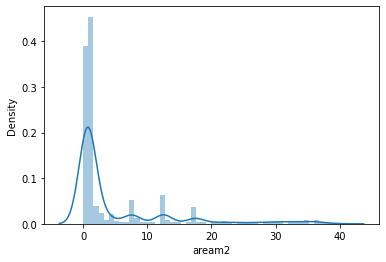

In [10]:
train["aream2"] = train["cover"] * train["area"]
sns.distplot(train["aream2"])

print("max : %f" %train["aream2"].max())
print("min : %f" %train["aream2"].min())
print('Skewness: %f' %train["aream2"].skew())  #歪度
print('Kurtosis: %f' %train["aream2"].kurt())  #尖度

In [ ]:
train = train.loc[train["cover"]<=.7].reset_index(drop=True)

In [ ]:
train_missing_50 = train_missing[train_missing.percent<0.5].index
test_missing_50 =  test_missing[test_missing.percent<0.5].index

categorical_features = train.dtypes[train.dtypes=="object"].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [ ]:
display(train[features])

,MIN_BWDRVI_2001,MIN_GARI_2012,MIN_D678_500_2005,MED_DSWI_5_2001,MED_CVI_2000,MIN_Chlgreen_2014,MED_AVI_2012,MIN_IF_2001,MIN_TIRS1_2001,MIN_Fe3_2013,...,MED_MCARI1_2002,MIN_Fe3_2018,MIN_GVMI_2000,MED_Cirededge_2000,MAX_AVI_2019,MIN_SWIR1_2016,MAX_GEMI_2006,MIN_NormG_2000,MED_SWIR2_2006,MAX_TIRS1_2019
0,-0.977589,-0.234759,-48.371914,-1.597001,0.128762,2.777610,-15.589754,2.298508,8.460767,0.470199,...,NaN,0.377907,0.909279,-0.543788,14.297333,0.914739,-94.457474,0.481229,4.031934,8.766113
1,-0.972177,0.004549,-50.611984,-1.478850,0.037447,3.756540,-44.002716,3.146141,8.318785,0.443332,...,15.838764,0.651477,0.934891,-0.731078,-37.760155,0.333899,-210.201742,0.678651,0.787188,8.903461
2,-0.975527,NaN,NaN,-1.463942,NaN,5.199646,NaN,2.230292,8.251698,0.393406,...,NaN,0.456022,NaN,NaN,-20.140980,0.437492,NaN,NaN,NaN,9.195987
3,-0.981757,NaN,NaN,-1.843691,NaN,5.735113,NaN,2.208919,8.377042,0.350156,...,NaN,0.441651,NaN,NaN,-15.840238,0.271545,-56.419687,NaN,0.196690,9.171391
4,-0.942884,NaN,NaN,-0.760663,NaN,1.813548,NaN,2.395808,7.345996,0.386273,...,NaN,0.549269,NaN,NaN,-43.539903,0.322664,-2000.135266,NaN,6.664142,9.217524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13064,-0.956135,NaN,-42.681051,-0.785963,0.170512,1.919766,NaN,2.272958,8.452959,0.484257,...,15.760548,0.494047,0.936809,-0.309387,-1.783073,0.403540,-26.304340,0.521362,0.857821,9.123522
13065,-0.941488,NaN,NaN,-0.731021,NaN,1.886833,NaN,2.356719,7.440633,0.382989,...,NaN,0.532251,NaN,NaN,-38.256455,0.327888,-1052.284930,NaN,2.945107,9.222274
13066,NaN,-0.283148,-62.509386,NaN,0.258546,2.718457,-13.867289,NaN,NaN,0.357070,...,NaN,0.357601,0.901993,-0.436422,-14.570339,0.802996,-134.483733,0.485664,0.138045,9.038915
13067,-0.964957,NaN,NaN,-1.155236,NaN,2.579461,NaN,2.365998,7.730865,0.616264,...,NaN,0.669920,NaN,NaN,-96.607735,2.914969,-220.084382,NaN,0.142339,9.520713


In [ ]:
tr_mesh = train.mesh20.value_counts().index
te_mesh = test.mesh20.value_counts().index

test_only_mesh = list(set(te_mesh)-set(tr_mesh))
test_mesh = list(set(te_mesh)-set(test_only_mesh))

In [ ]:
for col in test_mesh:
  print(f"{col} : {train.loc[train.mesh20==col].shape[0]}")

3725_10 : 187
3927_23 : 387
3624_10 : 1251
3926_22 : 34
3725_01 : 474
3926_13 : 54
3624_31 : 27
3927_02 : 211
3624_20 : 1400
3927_03 : 146
3623_03 : 6
4027_03 : 117


In [ ]:
def get_mesh_values(df):
  _df = df["mesh20"].str.split('_').apply(pd.Series).astype(float)
  _df.columns = ["mesh20_left","mesh20_right"]
  df["mesh20_left"] = _df["mesh20_left"].astype(int)
  df["mesh20_right"] = _df["mesh20_right"].astype(int)
  return df

In [ ]:
train = get_mesh_values(train)
test = get_mesh_values(test)

In [ ]:
tr_mesh_l = train.mesh20_left.value_counts().index
te_mesh_l = test.mesh20_left.value_counts().index

tr_mesh_r = train.mesh20_right.value_counts().index
te_mesh_r = test.mesh20_right.value_counts().index

print(set(te_mesh_l)-set(tr_mesh_l))
print(set(te_mesh_r)-set(tr_mesh_r))

set()
set()


In [ ]:
train.mesh20_left.value_counts()

3624    3230
3725    2303
3927    2262
3623    1608
4027    1572
3928     954
4028     527
3926     233
3831     184
3724     128
3622      68
Name: mesh20_left, dtype: int64

In [ ]:
train.mesh20_right.value_counts()

13    2250
20    1834
23    1539
10    1502
30    1283
11     972
0      823
1      748
12     444
22     379
2      352
3      269
33     264
21     172
31     171
32      67
Name: mesh20_right, dtype: int64

In [ ]:
train.groupby("mesh20")["cover"].agg(["mean","median","std"])

,mean,median,std
mesh20,,,
3622_23,0.058088,0.050,0.023831
3623_02,0.143615,0.050,0.179109
3623_03,0.403600,0.450,0.142856
3623_12,0.081778,0.050,0.096670
3623_13,0.207494,0.050,0.246894
3623_20,0.077907,0.050,0.052670
3623_22,0.081064,0.050,0.101621
3623_23,0.102610,0.050,0.143375
3624_10,0.150445,0.050,0.198559


In [ ]:
train.groupby("mesh20_left")["cover"].agg(["mean","median","std"])

,mean,median,std
mesh20_left,,,
3622,0.058088,0.050,0.023831
3623,0.153360,0.050,0.205984
3624,0.140823,0.050,0.209057
3724,0.073438,0.050,0.064581
3725,0.073843,0.050,0.103800
3831,0.050000,0.050,0.000000
3926,0.070644,0.050,0.094550
3927,0.107670,0.025,0.165700
3928,0.087762,0.025,0.156250


In [ ]:
train.groupby("mesh20_right")["cover"].agg(["mean","median","std"])

,mean,median,std
mesh20_right,,,
0,0.089064,0.025,0.165111
1,0.052555,0.050,0.045064
2,0.052108,0.025,0.062684
3,0.103798,0.050,0.155676
10,0.133460,0.050,0.185155
11,0.059516,0.050,0.037002
12,0.056325,0.050,0.079455
13,0.232227,0.075,0.241071
20,0.124083,0.030,0.203648


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

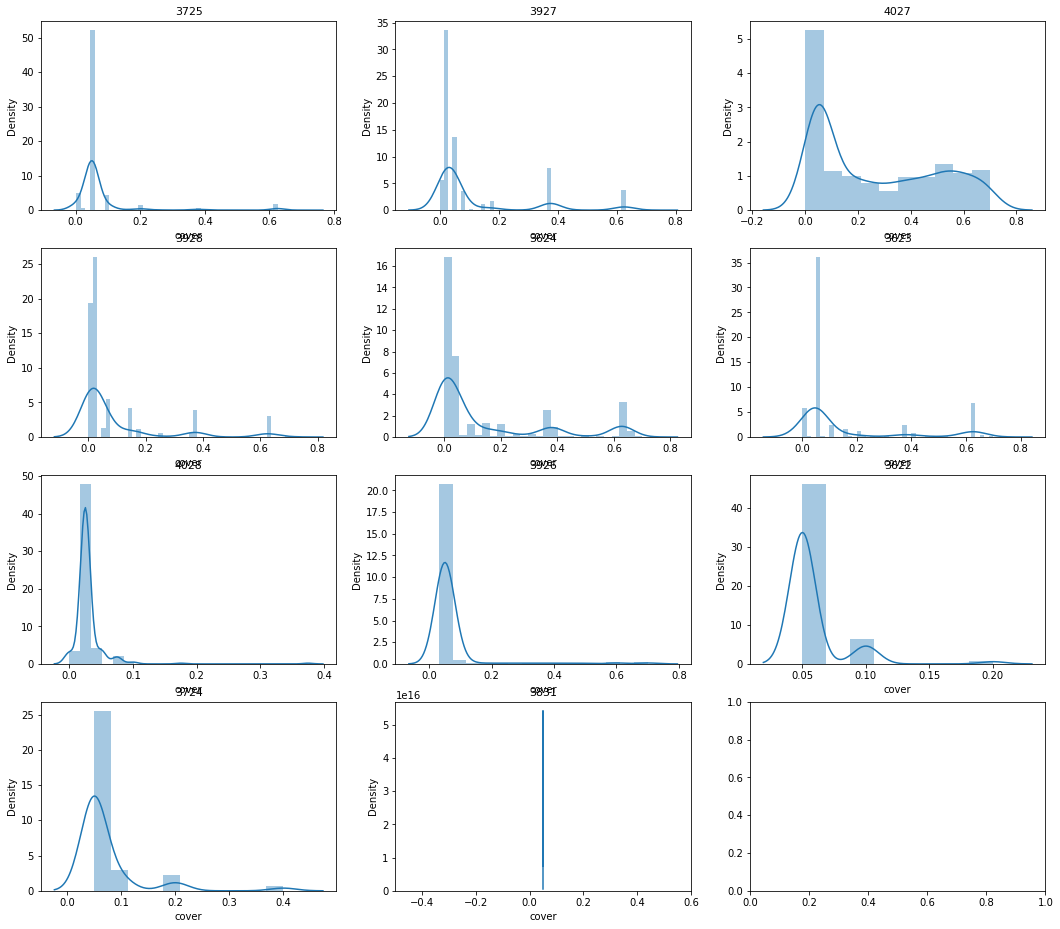

In [ ]:
nr_rows = int(len(train.mesh20_left.unique()) / 3) + 1
nr_cols = 3

mesh20_left_list = list(train.mesh20_left.unique())

fig,axs = plt.subplots(nr_rows,nr_cols,figsize=(nr_cols*6,nr_rows*4))

for r in range(0,nr_rows):
  for c in range(0,nr_cols):
    i = r*nr_cols+c
    if i < len(mesh20_left_list):
      col = mesh20_left_list[i]
      sns.distplot(train.loc[train.mesh20_left==col]["cover"], ax=axs[r][c])
      str_title = col
      axs[r][c].set_title(str_title,fontsize=11)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

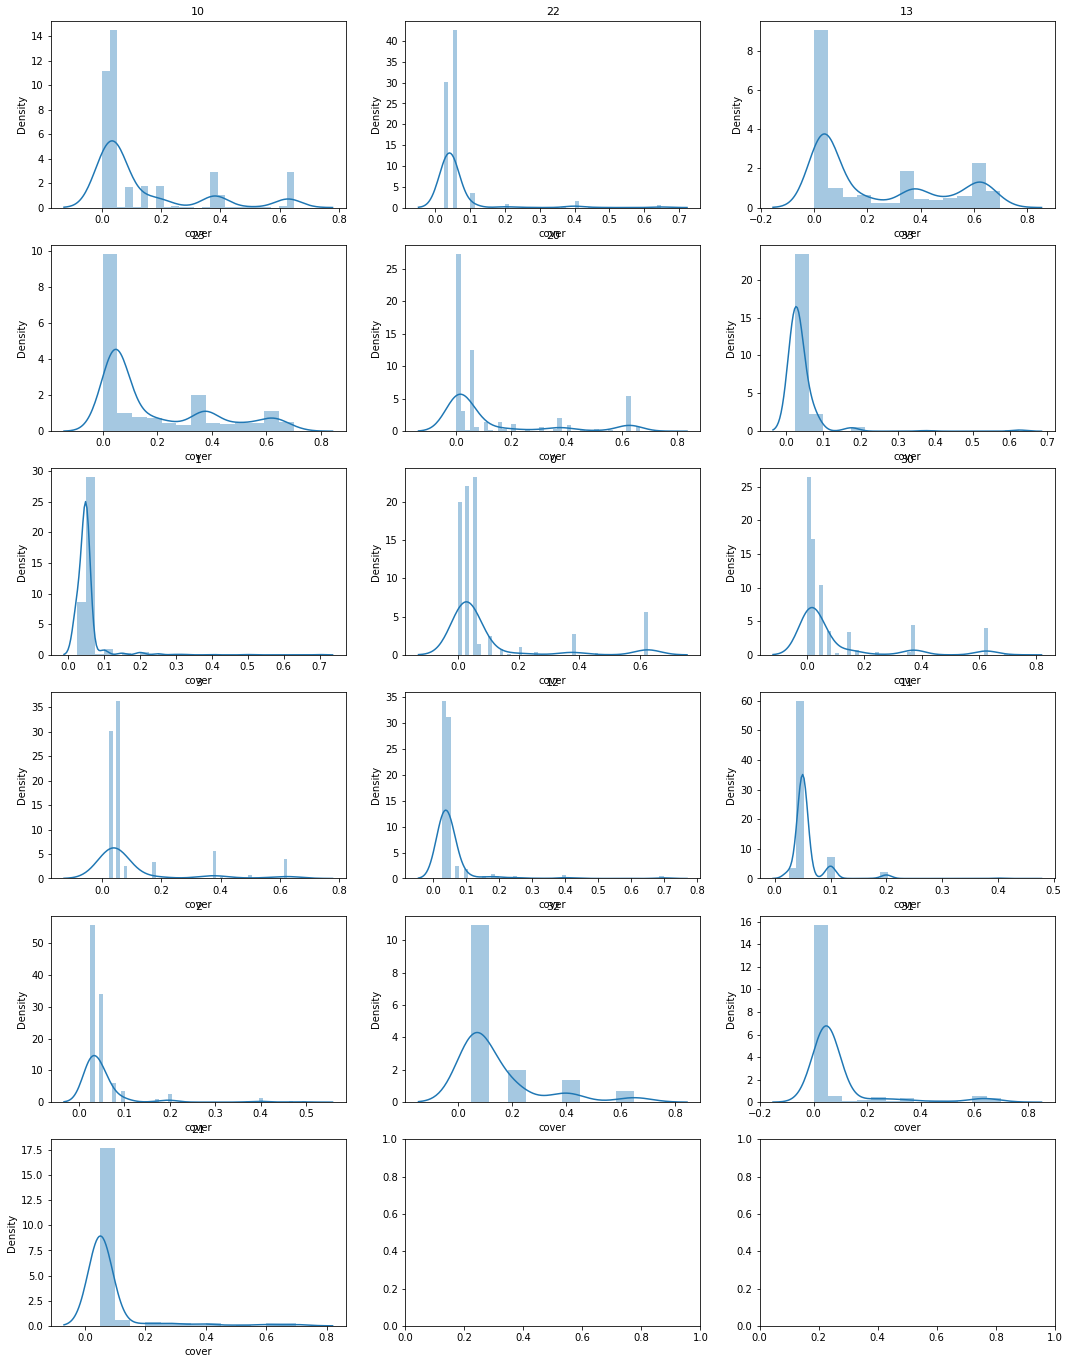

In [ ]:
nr_rows = int(len(train.mesh20_right.unique()) / 3) + 1
nr_cols = 3

mesh20_right_list = list(train.mesh20_right.unique())

fig,axs = plt.subplots(nr_rows,nr_cols,figsize=(nr_cols*6,nr_rows*4))

for r in range(0,nr_rows):
  for c in range(0,nr_cols):
    i = r*nr_cols+c
    if i < len(mesh20_right_list):
      col = mesh20_right_list[i]
      sns.distplot(train.loc[train.mesh20_right==col]["cover"], ax=axs[r][c])
      str_title = col
      axs[r][c].set_title(str_title,fontsize=11)

## Model

In [ ]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error

In [ ]:
class CFG:
  ver=5
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols="cover"
  boosting_type="gbdt"
  fold_target=["bins","mesh20_left","mesh20_right"]

In [ ]:
# =========================================================================================
# CV split
# =========================================================================================
target_bins = [-1, .1, .3, .5, 1]
target_bin_name = ['0-0.1', '0.1-0.3', '0.3-0.5', '0.5-']
train["target_bins"] = pd.cut(train[target].cover, bins=target_bins, labels=target_bin_name)
bins_map = {'0-0.1':0, '0.1-0.3':1, '0.3-0.5':2, '0.5-':3}
train["bins"] = train["target_bins"].map(bins_map)

Fold = MultilabelStratifiedKFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
for n, (train_index, val_index) in enumerate(Fold.split(train, train[CFG.fold_target])):
    train.loc[val_index, 'fold'] = int(n)
train['fold'] = train['fold'].astype(int)
display(train.groupby('fold').size())

fold
0    3267
1    3267
2    3268
3    3267
dtype: int64

In [ ]:
features = list(features)
features.remove('id')

In [ ]:
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6,
        "n_estimators":1000
    }

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.0962029
[400]	valid_0's rmse: 0.0954383
Early stopping, best iteration is:
[504]	valid_0's rmse: 0.0952742
RMSE : 0.09527415366217497
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.0925646
[400]	valid_0's rmse: 0.0909758
[600]	valid_0's rmse: 0.0906939
Early stopping, best iteration is:
[668]	valid_0's rmse: 0.0906327
RMSE : 0.09063265847719704
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.0907297
[400]	valid_0's rmse: 0.089603
Early stopping, best iteration is:
[511]	valid_0's rmse: 0.0894976
RMSE : 0.08949758911904801
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.0938756
[400]	valid_0's rmse: 0.092531
Early stoppi

,feature,importance
1806,month,0.004969
1596,sst_diff,0.003573
2128,sst_ymd,0.003243
2167,VARIgreen,0.002867
1351,depth,0.002777
1208,Blue,0.002537
898,Alteration,0.002477
982,MCARI1,0.002432
1589,MAX_CI,0.002327
2911,TIRS2,0.002087


CV Score: 0.09195181069881601


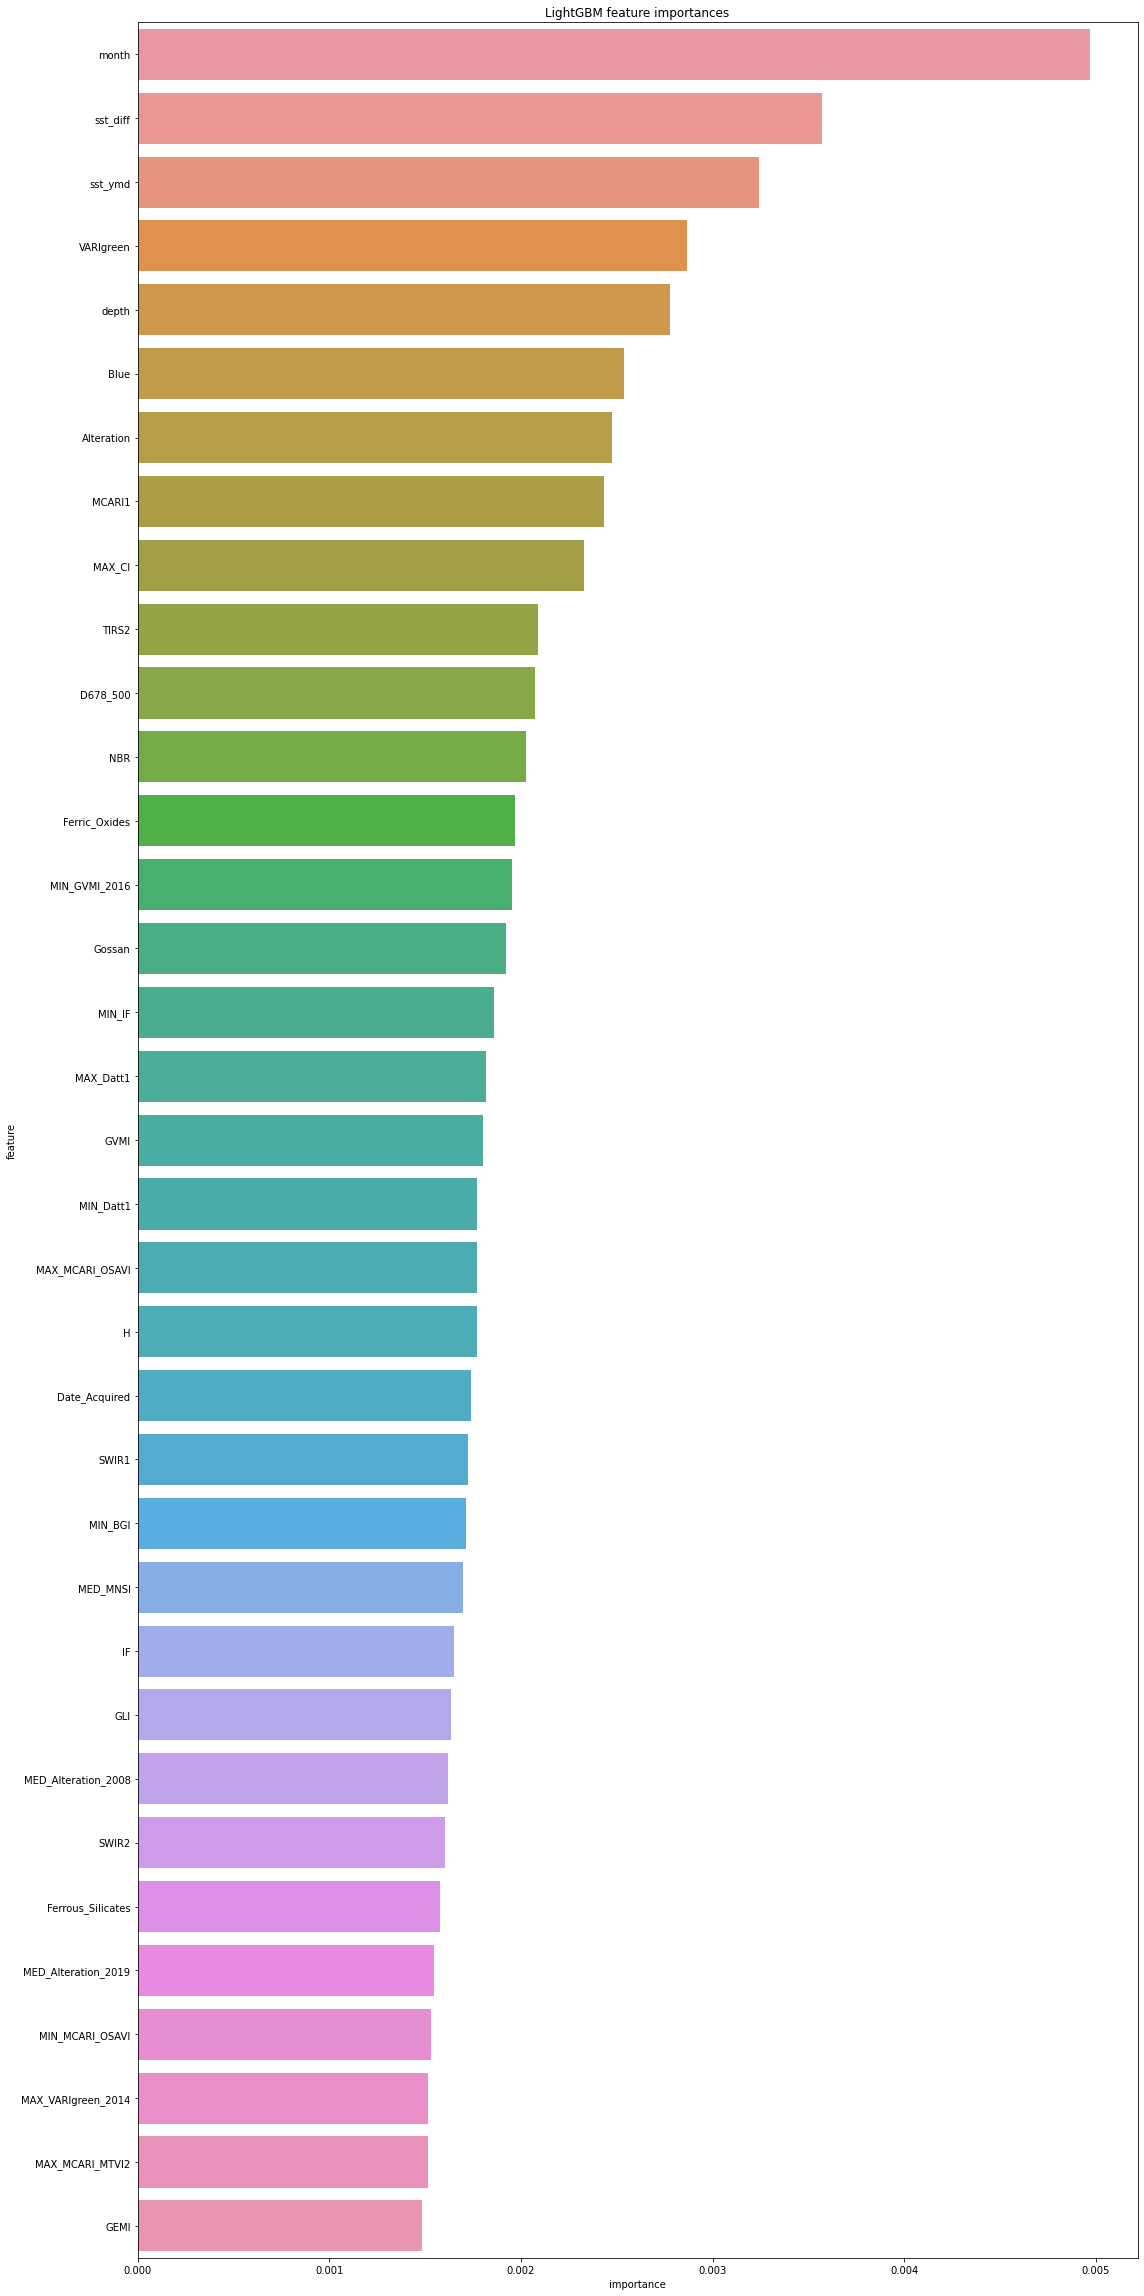

In [ ]:
oof_df = pd.DataFrame()
df_importance = pd.DataFrame({'feature': features})
df_importance['importance'] = 0
test_preds = np.zeros((len(test), CFG.n_folds))

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[features].values
    valid_X = valid_folds[features].values
    test_X = test[features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    test_preds[:, fold] = model.predict(test_X)
    oof_df = pd.concat([oof_df, valid_folds])

    f_importance = np.array(model.feature_importances_)
    temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
    df_importance['importance'] += temp_importance['importance']

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
df_importance = df_importance.sort_values('importance', ascending=False)
best_features35 = df_importance.iloc[:35].feature.tolist()
best_features50 = df_importance.iloc[:50].feature.tolist()
display(df_importance.head(35))
fig = plt.figure(figsize=(16, 32), tight_layout=True)
sns.barplot(x="importance", y="feature", data=df_importance.head(35))
plt.title("LightGBM feature importances")
score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')

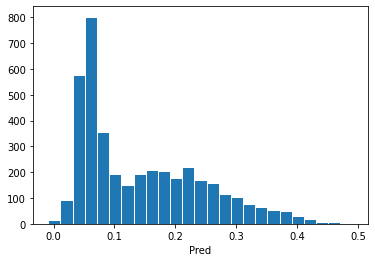

In [ ]:
plt.hist(np.mean(test_preds, axis=1),bins=25,edgecolor='white')
plt.xlabel("Pred")
plt.show()

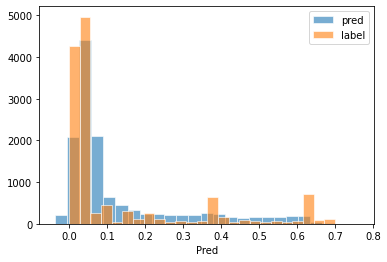

In [ ]:
plt.hist(oof_df.pred, label='pred', bins=25, edgecolor='white', alpha=.6)
plt.hist(oof_df.cover, label="label", bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

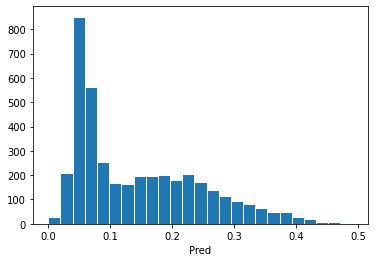

,pred
0,0.013368
1,0.055081
2,0.181425
3,0.043794
4,0.251174
...,...
4034,0.057000
4035,0.041816
4036,0.281734
4037,0.209892


In [ ]:
pred_df = pd.DataFrame(np.mean(test_preds, axis=1))
pred_df.columns = ["pred"]
pred_df["pred"] = pred_df["pred"].apply(lambda x: x if x>0 else 0)
pred_df["pred"] = pred_df["pred"].apply(lambda x: x if x<1 else 1)
pred_df.to_csv(os.path.join(OUTPUT_DIR, f'submit_{CFG.model}_seed{CFG.seed}_ver{CFG.ver}.csv'), header=False)

plt.hist(pred_df.pred,bins=25,edgecolor='white')
plt.xlabel("Pred")
plt.show()

display(pred_df)